In [1]:
from adata.stock import Stock
from jinja2.lexer import TOKEN_LTEQ
%load_ext autoreload
%autoreload 2

/Users/Joel/Library/Python/3.7/lib/python/site-packages/urllib3/__init__.py:38: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  exceptions.NotOpenSSLWarning,


In [2]:
from database import Database
from crawler import Crawler
from api_source import TiingoApiSource, AshareApiSource, FederalFinanceAPI, BureauOfLaborStatisticsAPI
from mock_trade import MockTrade, Trade
from datetime import datetime
from backend import Backend
from frontend import Frontend
from cert import TiingoKey
from main import *
from backend import Backend
import matplotlib.pyplot as plt
from logging_config import set_quiet_mode

set_quiet_mode()


## Refresh Data

In [4]:
refresh_portfolio_data("fidelity")

2025-11-06 20:16:37,996 - api_source.TiingoApiSource - INFO - TiingoApiSource initialized with quota_limit: None


🔄 Refreshing portfolio data...
📁 Refreshing specific portfolio: fidelity
📄 Processing portfolio: fidelity
   ✓ Extracted symbols from fidelity

🎯 Found 1 unique symbols:
   VLXVX

📊 Symbol breakdown:
   Chinese stocks (SH/SZ): 0 - []
   US/Other stocks: 1 - ['VLXVX']
📅 Target end date: 2025-11-06

📊 Checking database for existing data...
   VLXVX: Latest data until 2025-11-03

🇺🇸 Updating 1 US/Other stocks using TiingoApiSource...
📅 Using start date: 2025-10-07
✓ Crawler initialized with TiingoApiSource
✓ Data will be stored in: /Users/Joel/PycharmProjects/StockAnalysis/data/stock_data.pkl
🚀 Starting batch crawl for 1 symbols from 2025-10-07 to 2025-11-06
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (1 symbols)
[1/1] Processing VLXVX...
📡 [Tiingo] Fetching data for VLXVX from 2025-10-07 to 2025-11-06...
✓ [Tiingo] Successfully fetched 22 days of data
💾 Writing batch 1 (1 symbols) to database...
📊 Merged data: 433173 existing + 22 new = 433195 total rows
💾

In [171]:
backend = Backend(database=Database(file_path=os.path.join(DATA_DIR, "stock_data.pkl")))
prices = backend.get_daily_price("BRK-B", '2025-10-17', '2025-11-04')
prices

,Open,High,Low,Close,Volume,Split Factor,Adj Close,Adj Volume
2025-10-17,490.00,493.4500,489.2500,492.42,3794296.0,1.0,492.42,3794296.0
2025-10-20,492.36,494.4150,490.3201,494.08,4605314.0,1.0,494.08,4605314.0
2025-10-21,493.70,495.7000,491.2500,491.29,2714528.0,1.0,491.29,2714528.0
2025-10-22,491.73,492.9800,488.1901,491.81,3376019.0,1.0,491.81,3376019.0
2025-10-23,492.19,492.4500,488.1132,490.16,3063026.0,1.0,490.16,3063026.0
2025-10-24,490.91,492.9800,489.4000,492.10,3166824.0,1.0,492.10,3166824.0
2025-10-27,491.92,492.3000,484.5500,488.07,6451495.0,1.0,488.07,6451495.0
2025-10-28,484.96,485.6700,481.1100,481.44,5029140.0,1.0,481.44,5029140.0
2025-10-29,477.32,478.8000,473.7200,475.76,6204476.0,1.0,475.76,6204476.0
2025-10-30,474.84,480.9088,474.8400,478.52,4786554.0,1.0,478.52,4786554.0


## Robinhood

In [130]:
rbh_portfolio = Portfolio.from_file("robinhood")
rbh_position = rbh_portfolio.get_current_position(target_date='2025-11-04')


📊 Portfolio Position: robinhood
💰 Cash Available: $706,259.00

📈 Current Positions:
------------------------------------------------------------------------------------------------------------------------
Symbol   Shares     Invested     Avg Price  Curr Price Change   Curr Value   P&L          Portion  Cash %  
--------------------------------------------------------------------------------------------------------------------------------
BRK-B    92         $44,838      $489.70    $487.66    -0.4%    $44,651      -$187 ✗      47.9%    5.6%    
TLT      247        $22,233      $89.97     $89.94     -0.0%    $22,225      -$8 ✗        23.9%    2.8%    
DBC      588        $13,335      $22.67     $22.89     +1.0%    $13,463      +$128 ✓      14.5%    1.7%    
IAU      172        $13,335      $77.40     $74.21     -4.1%    $12,786      -$549 ✗      13.7%    1.7%    
-----------------------------------------------------------------------------------------------------------------------------

In [114]:
rbh_trade_rec = rbh_portfolio.get_next_trade(target_date='2025-11-04')



🎯 Next Trade Recommendation: robinhood
💰 Investment Amount: $24,000.00
📊 Cash Percentage Used: 3.0%

📈 Allocation Analysis:
----------------------------------------------------------------------
Symbol   Current    Target     Gap        Recommended 
----------------------------------------------------------------------
BRK-B    47.9%      40.0%      -7.9% ⬆    $1,968      
TLT      23.9%      40.0%      +16.1% ⬇   $22,032     
DBC      14.5%      10.0%      -4.5% ⬆    -           
IAU      13.7%      10.0%      -3.7% ⬆    -           
----------------------------------------------------------------------
TOTAL               100.0%                $24,000

💡 Rationale:
   Investment amount: $24,000.00 (3.0% of $800,000.00 cash). Overweight positions: BRK-B (-7.9%), DBC (-4.5%), IAU (-3.7%). Underweight positions: TLT (+16.1%). Recommended trades: BRK-B: $1,967.54, TLT: $22,032.46


## Chinese Stock

In [149]:
cn_portfolio = Portfolio.from_file("chinese_stock")
cn_position = cn_portfolio.get_current_position(target_date='2025-11-04')


📊 Portfolio Position: chinese_stock
💰 Cash Available: $1,040,616.00

📈 Current Positions:
------------------------------------------------------------------------------------------------------------------------
Symbol   Shares     Invested     Avg Price  Curr Price Change   Curr Value   P&L          Portion  Cash %  
--------------------------------------------------------------------------------------------------------------------------------
SH510050 62,139     $194,748     $3.13      $3.16      +0.7%    $196,111     +$1,363 ✓    75.9%    15.0%   
SH588000 42,810     $64,636      $1.51      $1.46      -3.6%    $62,289      -$2,347 ✗    24.1%    5.0%    
--------------------------------------------------------------------------------------------------------------------------------
TOTAL    104,949    $259,384     -          -          -        $258,400     $-984 ✗      100.0%   20.0%   
--------------------------------------------------------------------------------------------------

In [108]:
cn_trade_rec = cn_portfolio.get_next_trade(target_date='2025-11-04')



🎯 Next Trade Recommendation: chinese_stock
💰 Investment Amount: $65,000.00
📊 Cash Percentage Used: 5.0%

📈 Allocation Analysis:
----------------------------------------------------------------------
Symbol   Current    Target     Gap        Recommended 
----------------------------------------------------------------------
SH510050 75.9%      75.0%      -0.9% ✓    $46,439     
SH588000 24.1%      25.0%      +0.9% ✓    $18,561     
----------------------------------------------------------------------
TOTAL               100.0%                $65,000

💡 Rationale:
   Investment amount: $65,000.00 (5.0% of $1,300,000.00 cash). Recommended trades: SH510050: $46,438.90, SH588000: $18,561.10


## Fidelity

In [172]:
fd_portfolio = Portfolio.from_file("fidelity")
fd_position = fd_portfolio.get_current_position(target_date='2025-11-03')


📊 Portfolio Position: fidelity
💰 Cash Available: $20,170.00

📈 Current Positions:
------------------------------------------------------------------------------------------------------------------------
Symbol   Shares     Invested     Avg Price  Curr Price Change   Curr Value   P&L          Portion  Cash %  
--------------------------------------------------------------------------------------------------------------------------------
VLXVX    3,466      $139,830     $40.34     $40.40     +0.1%    $140,038     +$208 ✓      100.0%   87.4%   
--------------------------------------------------------------------------------------------------------------------------------
TOTAL    3,466      $139,830     -          -          -        $140,038     $+208 ✓      100.0%   87.4%   
--------------------------------------------------------------------------------------------------------------------------------

📊 Total Investment Metrics:
--------------------------------------------------
  💰 T

## Overall

In [177]:
cn_portfolio = Portfolio.from_file("chinese_stock", convert_currency="USD")
cn_position = cn_portfolio.get_current_position(target_date='2025-11-04')
overall_position = rbh_position.merge(cn_position)


🔄 Converting Chinese portfolio 'chinese_stock' from CNY to USD:
   Cash: ¥1,300,000.00 → $179,400.00 (rate: 0.1380)
   Converted 8 trade record amounts using historical rates

📊 Portfolio Position: chinese_stock
💰 Cash Available: $143,605.01

📈 Current Positions:
------------------------------------------------------------------------------------------------------------------------
Symbol   Shares     Invested     Avg Price  Curr Price Change   Curr Value   P&L          Portion  Cash %  
--------------------------------------------------------------------------------------------------------------------------------
SH510050 8,575      $26,875      $3.13      $3.16      +0.7%    $27,063      +$188 ✓      75.9%    15.0%   
SH588000 5,908      $8,920       $1.51      $1.46      -3.6%    $8,596       -$324 ✗      24.1%    5.0%    
--------------------------------------------------------------------------------------------------------------------------------
TOTAL    14,483     $35,795      

In [178]:
overall_position.pretty_print()


📊 Position
💰 Cash Available: $849,864.01

📈 Current Positions:
------------------------------------------------------------------------------------------------------------------------
Symbol   Shares     Invested     Avg Price  Curr Price Change   Curr Value   P&L          Portion  Cash %  
--------------------------------------------------------------------------------------------------------------------------------
BRK-B    92         $44,838      $489.70    $487.66    -0.4%    $44,651      -$187 ✗      34.7%    5.6%    
TLT      247        $22,233      $89.97     $89.94     -0.0%    $22,225      -$8 ✗        17.3%    2.8%    
DBC      588        $13,335      $22.67     $22.89     +1.0%    $13,463      +$128 ✓      10.5%    1.7%    
IAU      172        $13,335      $77.40     $74.21     -4.1%    $12,786      -$549 ✗      9.9%     1.7%    
SH510050 8,575      $26,875      $3.13      $3.16      +0.7%    $27,063      +$188 ✓      21.0%    15.0%   
SH588000 5,908      $8,920       $1.51

0.9825

## Plots

Style 'seaborn-v0_8' not available, using default


  0: SPY - 4713 rows
      Price range: 0.48 to 4.72
  1: BRK-B - 4738 rows
      Price range: 0.63 to 7.41
📈 Plotting comparison chart for 2 symbols...

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest:    4.655 | Min:    0.482 | Max:    4.717 | Avg:    1.846
 BRK-B: Latest:    6.693 | Min:    0.631 | Max:    7.409 | Avg:    2.567
💡 Hover over the lines to see detailed information
💡 Use plt.show() to display the plot when ready


/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:221: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


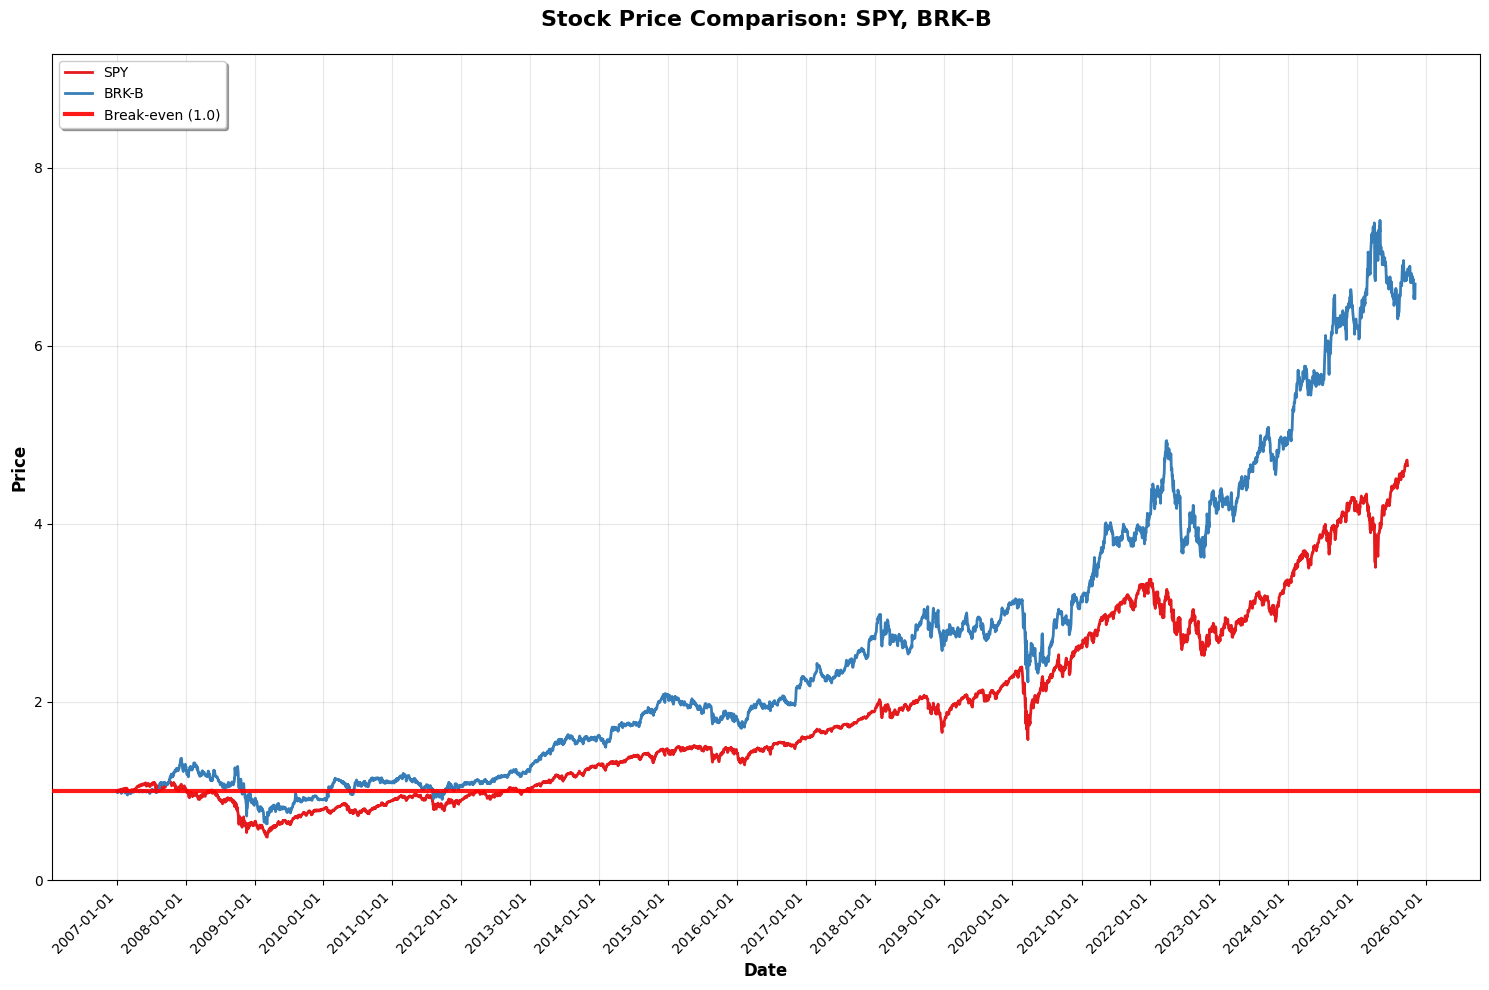

In [4]:
# Scenario 1: the usefulness of macro-trading: it beats SPY by 3.6%, beats BRKB by 1.5%

START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "BRK-B"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol='SPY', normalize=True),
        StockConfig(symbol='BRK-B', normalize=True),
    ],
    # environments=MacroConfig(
    #     interest_rate=True,
    #     cpi=True,
    #     unemployment_rate=True,
    # ),
    start_date=START_DATE, end_date=END_DATE
)


In [13]:
# Scenario 2: the variation range of one macro-trading operation

START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "BRK-B"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='IAU', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY50-TLT25-IAU10-DBC15",
            trade_history=[
                Trade(symbol=EQUITY, cash_amount=500000, date=START_DATE),
                Trade(symbol="TLT", cash_amount=300000, date=START_DATE),
                Trade(symbol="IAU", cash_amount=100000, date=START_DATE),
                Trade(symbol="DBC", cash_amount=100000, date=START_DATE),
                Trade(symbol="DBC", cash_amount=-INF, date='2008-06-25'),
                Trade(symbol=EQUITY, cash_amount=INF, date='2008-06-26'),
                Trade(symbol="TLT", cash_amount=-INF, date='2008-12-22'),
                Trade(symbol=EQUITY, cash_amount=INF, date='2008-12-23'),
                Trade(symbol=EQUITY, percentage=-20, date='2021-02-01'),
                Trade(symbol="DBC", cash_amount=INF, date='2021-02-02'),
                Trade(symbol="DBC", cash_amount=-INF, date='2022-07-25'),
                Trade(symbol=EQUITY, cash_amount=INF, date='2022-07-26'),
            ],
        ),
    ],
    benchmark='BRK-B',
    # environments=MacroConfig(
    #     interest_rate=True,
    #     cpi=True,
    #     unemployment_rate=True,
    # ),
    start_date=START_DATE, end_date=END_DATE
)
